In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

In [63]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from math import inf

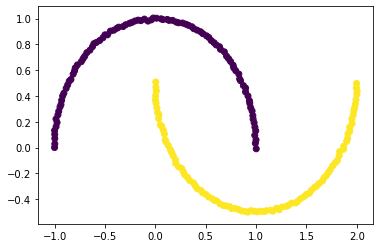

In [64]:
X, y = make_moons(n_samples = 200, noise = 0.005, random_state = 417) 
  
plt.scatter(X[:, 0], X[:, 1], c = y) 
plt.show()

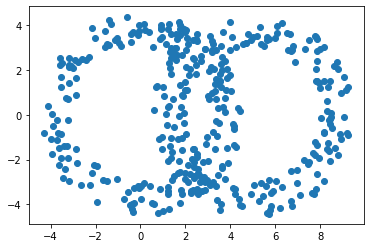

In [59]:
X = np.loadtxt("data1.txt", delimiter=" ")
plt.scatter(X[:, 0], X[:, 1]) 
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()

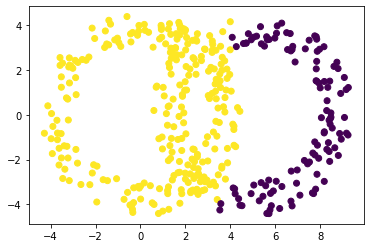

In [45]:
clustering = SpectralClustering(n_clusters=2, affinity="nearest_neighbors").fit(X)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()

In [47]:
# Define different kernels

class linear_kernel:
    def run(self, x, y):
        return(np.dot(x.T, y))

class poly_kernel:
    def __init__(self, c0=1, d=3, gamma = None):
        self.c0 = c0
        self.d = d
        self.gamma = gamma
        
    def run(self, x, y):
        if (self.gamma == None):
            self.gamma = 1 / x.size
        
        return((self.gamma * np.dot(x.T, y) + self.c0) ** self.d)
    
class sigmoid_kernel:
    def __init__(self, c0=1, gamma=None):
        self.c0 = c0
        self.gamma = gamma
        
    def run(self, x, y):
        if (self.gamma == None):
            self.gamma = 1 / x.size
            
        return(np.tanh(self.gamma * np.dot(x.T, y) + self.c0))
        
class rbf_kernel:
    def __init__(self, sigma):
        self.sigma = sigma
        
    def run(self, x, y):
        delta =abs(np.subtract(x, y))
        squaredEuclidean = (np.square(delta).sum())
        result = np.exp(-(squaredEuclidean)/(2*self.sigma**2))
        return result
    
    
def get_gram_matrix(kernel, X):
    K = np.zeros((X.shape[0], X.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            K[i][j] = kernel.run(X[i], X[j])
    return(K)



In [14]:
def assign_points_to_random_clusters(X, k):
    clusters = {}
    c_x = {}
    
    for c in range(k):
        clusters[c] = []
    
    for x in range(X.shape[0]):
        c = np.random.choice(list(range(k)))
        clusters[c].append(x)
        c_x[x] = c
        
    return(clusters, c_x)

def print_img(clusters):
    cols = []
    for j in clusters:
        cols.append(clusters[j])

    plt.scatter(X[:, 0], X[:, 1], c=cols)
    plt.show()

In [16]:
def compute_point_cluster_similarity(x, Cs, K):
    s = 0
    
    for j in Cs:
        s += K[x][j]
        
    s = (2 / len(Cs)) * s 
    
    return s

def compute_inter_cluster_similarity(K, Cs):
    s = 0
    for i in Cs:
        for j in Cs:
            s += K[i][j]
    
    s = s / (len(Cs) ** 2)
    
    return s


In [12]:
def kernel_KMeans(X, k, kernel):
    

    K = get_gram_matrix(kernel, X)
    
    clusters, c_x = assign_points_to_random_clusters(X, k)
    
    print_img(c_x)
    
    converged = False    
    
    while (converged == False):
        changes = 0
        
        for x in range(X.shape[0]):
            best_cluster = -1
            best_distance = inf
            
            for clst in range(k):
                inter_cluster_similarity = compute_inter_cluster_similarity(K, clusters[clst])
                
                point_cluster_similarity = compute_point_cluster_similarity(x, clusters[clst], K)
                
                dist = inter_cluster_similarity - point_cluster_similarity
            
                if (dist < best_distance):
                    best_distance = dist
                    best_cluster = clst
            
            if (best_cluster != c_x[x]):
                changes += 1
            
            c_x[x] = best_cluster
        
        for c in range(k):
            clusters[c] = []
        
        for x in range(X.shape[0]):
            clusters[c_x[x]].append(x)
        
        print_img(c_x)
        print(changes)
        
        if (changes == 0):
            converged = True
            
    return(c_x)
    

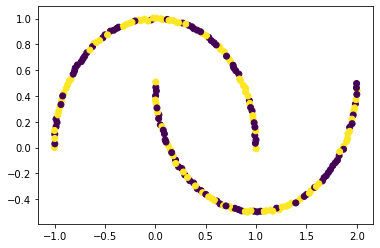

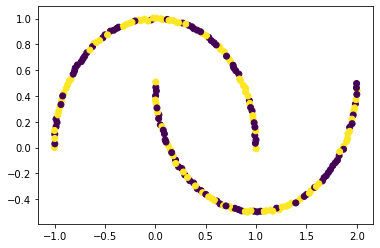

0


In [71]:
clusters = kernel_KMeans(X, 2, rbf_kernel(sigma = 0.0001))
